## Day 13

To analyze long-term climate patterns in Mumbai with focus on temperature rise, rainfall behavior, and extreme weather indicators for decision-making and awareness.

In [6]:
import pandas as pd

climate_df = pd.read_csv("climate_dashboard_base.csv")
seasonal_df = pd.read_csv("climate_seasonal_summary.csv")
yearly_df = pd.read_csv("climate_yearly_trend.csv")

In [7]:
climate_df.head()

,Year,Season,Temp_Range,Rain,Temp Max
0,1951.0,Winter,13.990001,0.0,28.530001
1,1951.0,Winter,14.370001,0.0,28.850000
2,1951.0,Winter,16.230000,0.0,30.660000
3,1951.0,Winter,15.780000,0.0,30.139999
4,1951.0,Winter,15.840000,0.0,29.180000


In [8]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26806 entries, 0 to 26805
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        26803 non-null  float64
 1   Season      26806 non-null  object 
 2   Temp_Range  26746 non-null  float64
 3   Rain        26806 non-null  float64
 4   Temp Max    26748 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.0+ MB


In [9]:
required_cols = [
    "Year", "Season", "Rain", "Temp Max", "Temp_Range", "Heatwave"
]

missing = [col for col in required_cols if col not in climate_df.columns]
missing

['Heatwave']

In [11]:
climate_df["Heatwave"] = (climate_df["Temp Max"] >= 40).astype(int)

In [12]:
# Heatwave = Temp Max ≥ 40°C

In [13]:
kpis = {
    "Avg Max Temp": climate_df["Temp Max"].mean(),
    "Avg Rainfall": climate_df["Rain"].mean(),
    "Total Heatwave Days": climate_df["Heatwave"].sum(),
    "Avg Temp Range": climate_df["Temp_Range"].mean()
}

kpis

{'Avg Max Temp': np.float64(32.078837611832654),
 'Avg Rainfall': np.float64(0.38719316570916956),
 'Total Heatwave Days': np.int64(2),
 'Avg Temp Range': np.float64(11.318290536468558)}

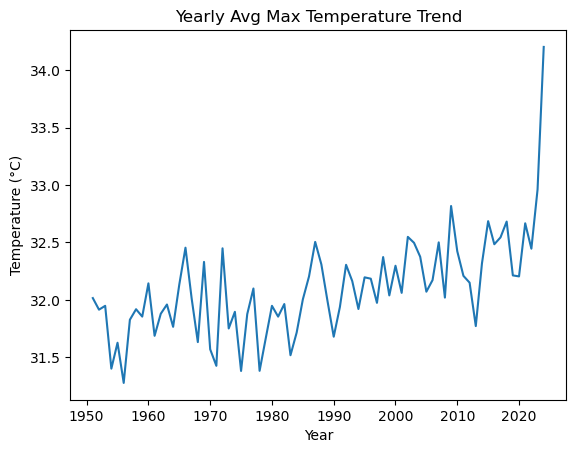

In [14]:
import matplotlib.pyplot as plt

# Temperature trend
plt.figure()
plt.plot(yearly_df["Year"], yearly_df["Temp Max"])
plt.title("Yearly Avg Max Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

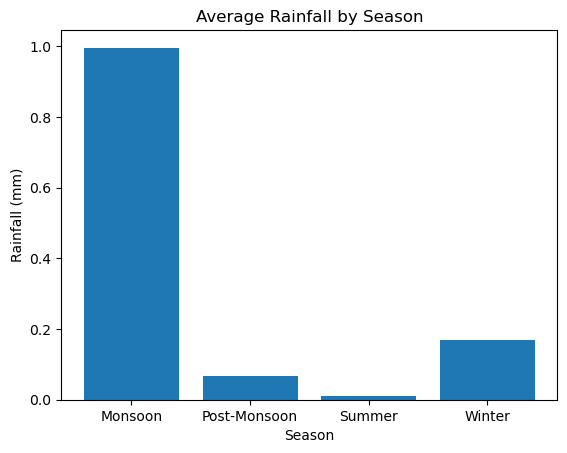

In [15]:
# Seasonal rainfall
plt.figure()
plt.bar(seasonal_df["Season"], seasonal_df["Rain"])
plt.title("Average Rainfall by Season")
plt.xlabel("Season")
plt.ylabel("Rainfall (mm)")
plt.show()

In [16]:
climate_df.to_csv("climate_dashboard_base.csv", index=False)
seasonal_df.to_csv("climate_seasonal_summary.csv", index=False)
yearly_df.to_csv("climate_yearly_trend.csv", index=False)

## Day 12 – Dashboard Preparation

Objective:
Prepare finalized datasets and KPIs for dashboarding.

Actions:
- Validated dataset structure and columns
- Calculated dashboard KPIs
- Performed visual sanity checks
- Locked final CSVs for BI tools

Outcome:
Data is dashboard-ready and tool-agnostic
(Tableau / Power BI / Streamlit).